In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Import our data
songs_df = pd.read_csv('SpotifyFeatures.csv')
songs_df.head(10)
songs_df.columns

Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [3]:
#Check the shape of the data
songs_df.shape

(232725, 18)

<AxesSubplot:>

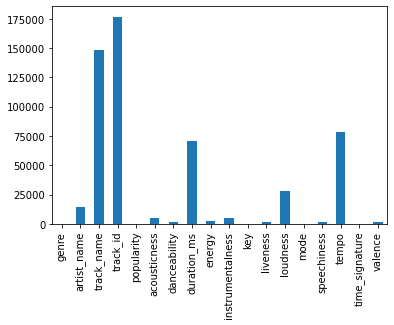

In [4]:
#Visualize unique values in each column
songs_df.nunique().plot(kind='bar')

In [5]:
#Find the number of songs for each genre in the dataset
songs_df['genre'].value_counts()

Comedy              9681
Soundtrack          9646
Indie               9543
Jazz                9441
Pop                 9386
Electronic          9377
Children’s Music    9353
Folk                9299
Hip-Hop             9295
Rock                9272
Alternative         9263
Classical           9256
Rap                 9232
World               9096
Soul                9089
Blues               9023
R&B                 8992
Anime               8936
Reggaeton           8927
Ska                 8874
Reggae              8771
Dance               8701
Country             8664
Opera               8280
Movie               7806
Children's Music    5403
A Capella            119
Name: genre, dtype: int64

In [8]:
#Create subsetted dataframe for our genre
rap_df = songs_df[songs_df['genre'] == 'Rap']
rap_df.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
86952,Rap,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.14900,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.55600,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913
86954,Rap,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446
86955,Rap,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.25900,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544


In [24]:
rap_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9232 entries, 86951 to 122396
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   popularity        9232 non-null   int64  
 1   acousticness      9232 non-null   float64
 2   danceability      9232 non-null   float64
 3   duration_ms       9232 non-null   int64  
 4   energy            9232 non-null   float64
 5   instrumentalness  9232 non-null   float64
 6   key               9232 non-null   object 
 7   liveness          9232 non-null   float64
 8   loudness          9232 non-null   float64
 9   mode              9232 non-null   object 
 10  speechiness       9232 non-null   float64
 11  tempo             9232 non-null   float64
 12  time_signature    9232 non-null   object 
 13  valence           9232 non-null   float64
dtypes: float64(9), int64(2), object(3)
memory usage: 1.1+ MB


In [12]:
#Get summary statistics for target variable
rap_df['popularity'].describe()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
86951,Rap,Post Malone,Wow.,6MWtB6iiXyIwun0YzU6DFP,99,0.16300,0.833,149520,0.539,0.000002,B,0.1010,-7.399,Minor,0.1780,99.947,4/4,0.385
86952,Rap,J. Cole,MIDDLE CHILD,2JvzF1RMd7lE3KmFlsyZD8,96,0.14900,0.837,213594,0.364,0.000000,G#,0.2710,-11.713,Major,0.2760,123.984,4/4,0.463
86953,Rap,Post Malone,Sunflower - Spider-Man: Into the Spider-Verse,3KkXRkHbMCARz0aVfEt68P,97,0.55600,0.760,158040,0.479,0.000000,D,0.0703,-5.574,Major,0.0466,89.911,4/4,0.913
86954,Rap,Travis Scott,SICKO MODE,2xLMifQCjDGFmkHkpNLD9h,94,0.00513,0.834,312820,0.730,0.000000,G#,0.1240,-3.714,Major,0.2220,155.008,4/4,0.446
86955,Rap,Meek Mill,Going Bad (feat. Drake),2IRZnDFmlqMuOrYOLnZZyc,95,0.25900,0.889,180522,0.496,0.000000,E,0.2520,-6.365,Minor,0.0905,86.003,4/4,0.544
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122392,Rap,Juicy J,On & On (feat. Tory Lanez & Belly),7DWIbNQklCxk329kZpW6so,51,0.04790,0.736,225613,0.581,0.000000,A,0.1670,-7.700,Minor,0.0697,126.006,4/4,0.480
122393,Rap,Eminem,Untouchable,6IvespQWGW4USXwexlVKDm,58,0.08030,0.554,370133,0.887,0.000000,G,0.1500,-3.367,Major,0.5030,172.233,4/4,0.648
122394,Rap,Lil Baby,Eat Or Starve,5v0XqJN4DE6kVDPfsetdKR,49,0.10700,0.738,180293,0.515,0.000000,C,0.0889,-10.120,Major,0.0984,75.040,4/4,0.647
122395,Rap,Future,Outta Time,0AkKwgg6rD4p7EpDlNpSz2,51,0.00597,0.750,168607,0.546,0.000032,F#,0.3770,-6.951,Minor,0.3840,75.443,4/4,0.438


In [21]:
#Check for null/missing values
rap_df.isnull().any()

genre               False
artist_name         False
track_name          False
track_id            False
popularity          False
acousticness        False
danceability        False
duration_ms         False
energy              False
instrumentalness    False
key                 False
liveness            False
loudness            False
mode                False
speechiness         False
tempo               False
time_signature      False
valence             False
dtype: bool

In [25]:
rap_df['key'].value_counts()

C#    1636
C      866
G#     826
B      821
G      787
D      767
A#     733
F      729
A      691
F#     659
E      504
D#     213
Name: key, dtype: int64